In [1]:
from pathlib import Path

import flopy as fp
from matplotlib.patches import Patch
import matplotlib.pyplot as plt
import numpy as np

In [2]:
workspace = Path("C:\\Users\\buckl\\Documents\\Software\\mf6.4.1\\examples\\ex-gwf-sfr-p01")
sim_name = "ex-gwf-sfr-p01"
sim = fp.mf6.MFSimulation.load(
    sim_name=sim_name,
    version="mf6",
    exe_name="C:\\Users\\buckl\\Documents\\Software\\mf6.4.1\\bin\\mf6.exe",
    sim_ws=workspace
)
sim

loading simulation...
  loading simulation name file...
  loading tdis package...
  loading model gwf6...
    loading package dis...
    loading package npf...
    loading package sto...
    loading package ic...
    loading package ghb...
    loading package wel...
    loading package rch...
    loading package evt...
    loading package sfr...
    loading package oc...
  loading solution package ex-gwf-sfr-p01...


sim_name = ex-gwf-sfr-p01
sim_path = C:\Users\buckl\Documents\Software\mf6.4.1\examples\ex-gwf-sfr-p01
exe_name = C:\Users\buckl\Documents\Software\mf6.4.1\bin\mf6.exe

###################
Package mfsim.nam
###################

package_name = mfsim.nam
filename = mfsim.nam
package_type = nam
model_or_simulation_package = simulation
simulation_name = ex-gwf-sfr-p01


###################
Package ex-gwf-sfr-p01.tdis
###################

package_name = ex-gwf-sfr-p01.tdis
filename = ex-gwf-sfr-p01.tdis
package_type = tdis
model_or_simulation_package = simulation
simulation_name = ex-gwf-sfr-p01


###################
Package ex-gwf-sfr-p01
###################

package_name = ex-gwf-sfr-p01
filename = ex-gwf-sfr-p01.ims
package_type = ims
model_or_simulation_package = simulation
simulation_name = ex-gwf-sfr-p01


@@@@@@@@@@@@@@@@@@@@
Model ex-gwf-sfr-p01
@@@@@@@@@@@@@@@@@@@@

name = ex-gwf-sfr-p01
model_type = gwf6
version = mf6
model_relative_path = 

###################
Package dis
#######

In [3]:
sim.model_names

['ex-gwf-sfr-p01']

In [4]:
model = sim.get_model(model_name="ex-gwf-sfr-p01")
model

name = ex-gwf-sfr-p01
model_type = gwf6
version = mf6
model_relative_path = 

###################
Package dis
###################

package_name = dis
filename = ex-gwf-sfr-p01.dis
package_type = dis
model_or_simulation_package = model
model_name = ex-gwf-sfr-p01


###################
Package npf
###################

package_name = npf
filename = ex-gwf-sfr-p01.npf
package_type = npf
model_or_simulation_package = model
model_name = ex-gwf-sfr-p01


###################
Package sto
###################

package_name = sto
filename = ex-gwf-sfr-p01.sto
package_type = sto
model_or_simulation_package = model
model_name = ex-gwf-sfr-p01


###################
Package ic
###################

package_name = ic
filename = ex-gwf-sfr-p01.ic
package_type = ic
model_or_simulation_package = model
model_name = ex-gwf-sfr-p01


###################
Package ghb_0
###################

package_name = ghb_0
filename = ex-gwf-sfr-p01.ghb
package_type = ghb
model_or_simulation_package = model
model_name = ex-g

In [5]:
sim.get_package("tdis")

package_name = ex-gwf-sfr-p01.tdis
filename = ex-gwf-sfr-p01.tdis
package_type = tdis
model_or_simulation_package = simulation
simulation_name = ex-gwf-sfr-p01

Block options
--------------------
time_units
{internal}
('seconds')


Block dimensions
--------------------
nper
{internal}
(3)


Block perioddata
--------------------
perioddata
{internal}
(rec.array([(0.00000e+00,  1, 1. ), (1.57788e+09, 50, 1.1),
           (1.57788e+09, 50, 1.1)],
          dtype=[('perlen', '<f8'), ('nstp', '<i4'), ('tsmult', '<f8')]))



In [6]:
model.get_package("dis")

package_name = dis
filename = ex-gwf-sfr-p01.dis
package_type = dis
model_or_simulation_package = model
model_name = ex-gwf-sfr-p01

Block options
--------------------
length_units
{internal}
('feet')


Block dimensions
--------------------
nlay
{internal}
(1)

nrow
{internal}
(15)

ncol
{internal}
(10)


Block griddata
--------------------
delr
{constant 5000.0}

delc
{constant 5000.0}

top
{internal}
(array([[1105., 1105.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.],
       [1105., 1095., 1105.,    0.,    0., 1100., 1100., 1110.,    0.,
           0.],
       [   0., 1100., 1085., 1080., 1078., 1076., 1073., 1090.,    0.,
           0.],
       [1110., 1100., 1090., 1085., 1076., 1080., 1080., 1070., 1100.,
           0.],
       [1110., 1100., 1085., 1080., 1078., 1074., 1077., 1066., 1075.,
        1080.],
       [1105., 1095., 1080., 1077., 1073., 1069., 1070., 1063., 1085.,
        1095.],
       [1105., 1090., 1075., 1072., 1070., 1065., 1065., 1069., 1090.,


In [7]:
sim.check()

Checking model "ex-gwf-sfr-p01"...

ex-gwf-sfr-p01 MODEL DATA VALIDATION SUMMARY:
  No errors or warnings encountered.

  Checks that passed:
    npf package: zero or negative horizontal hydraulic conductivity values
    npf package: horizontal hydraulic conductivity values below checker threshold of 1e-11
    npf package: horizontal hydraulic conductivity values above checker threshold of 100000.0
    sto package: zero or negative specific storage values
    sto package: specific storage values below checker threshold of 1e-06
    sto package: specific storage values above checker threshold of 0.01
    sto package: zero or negative specific yield values
    sto package: specific yield values below checker threshold of 0.01
    sto package: specific yield values above checker threshold of 0.5
    ghb_0 package: BC indices valid
    ghb_0 package: not a number (Nan) entries
    ghb_0 package: BC in inactive cells
    wel_0 package: BC indices valid
    wel_0 package: not a number (Nan) 

In [8]:
success, buff = sim.run_simulation()
assert success, "MODFLOW did not terminate normally!"

FloPy is using the following executable to run the model: ..\..\bin\mf6.exe
                                   MODFLOW 6
                U.S. GEOLOGICAL SURVEY MODULAR HYDROLOGIC MODEL
                        VERSION 6.4.1 Release 12/09/2022

   MODFLOW 6 compiled Dec 09 2022 18:18:37 with Intel(R) Fortran Intel(R) 64
   Compiler Classic for applications running on Intel(R) 64, Version 2021.7.0
                             Build 20220726_000000

This software has been approved for release by the U.S. Geological 
Survey (USGS). Although the software has been subjected to rigorous 
review, the USGS reserves the right to update the software as needed 
pursuant to further analysis and review. No warranty, expressed or 
implied, is made by the USGS or the U.S. Government as to the 
functionality of the software and related material nor shall the 
fact of release constitute any such warranty. Furthermore, the 
software is released on condition that neither the USGS nor the U.S. 
Government s

    Solving:  Stress period:     2    Time step:    11
    Solving:  Stress period:     2    Time step:    12
    Solving:  Stress period:     2    Time step:    13
    Solving:  Stress period:     2    Time step:    14
    Solving:  Stress period:     2    Time step:    15
    Solving:  Stress period:     2    Time step:    16
    Solving:  Stress period:     2    Time step:    17
    Solving:  Stress period:     2    Time step:    18
    Solving:  Stress period:     2    Time step:    19
    Solving:  Stress period:     2    Time step:    20
    Solving:  Stress period:     2    Time step:    21
    Solving:  Stress period:     2    Time step:    22
    Solving:  Stress period:     2    Time step:    23
    Solving:  Stress period:     2    Time step:    24
    Solving:  Stress period:     2    Time step:    25
    Solving:  Stress period:     2    Time step:    26
    Solving:  Stress period:     2    Time step:    27
    Solving:  Stress period:     2    Time step:    28
    Solvin

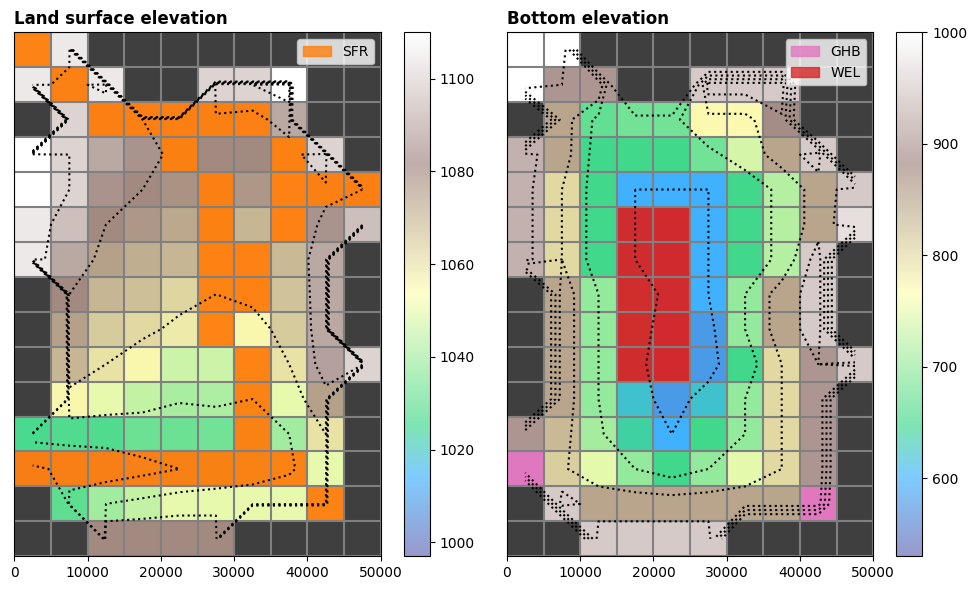

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, squeeze=True, figsize=(10, 6))

# plot top elevations
top_msk = np.ma.masked_array(
    data=model.get_package("dis").top.data,
    mask=model.get_package("dis").idomain.data == 0,
)
mapview_tlv = fp.plot.PlotMapView(model=model, ax=ax[0])
mapview_tlv.plot_ibound(alpha=0.5)
mapview_tlv.plot_grid()
tlv_fill = mapview_tlv.plot_array(top_msk, cmap="terrain", alpha=0.5)
plt.colorbar(tlv_fill, location="right", ticks=np.arange(1000, 1110, 20))
mapview_tlv.contour_array(
    top_msk, levels=np.arange(1000, 1110, 20), colors="black", linestyles="dotted"
)
mapview_tlv.plot_bc("SFR", color="tab:orange", alpha=0.8)
ax[0].legend(
    handles=[Patch(color="tab:orange", alpha=0.8, label="SFR")], loc="upper right"
)
ax[0].set_yticks([])
ax[0].set_title("Land surface elevation", loc="left", fontweight="bold")

# plot bottom elevations
botm_msk = np.ma.masked_array(
    data=model.get_package("dis").botm.data,
    mask=model.get_package("dis").idomain.data == 0,
)
mapview_blv = fp.plot.PlotMapView(model=model, ax=ax[1])
mapview_blv.plot_ibound(alpha=0.5)
mapview_blv.plot_grid()
blv_fill = mapview_blv.plot_array(botm_msk, cmap="terrain", alpha=0.5)
plt.colorbar(blv_fill, location="right")
mapview_blv.contour_array(
    botm_msk, levels=np.arange(600, 1000, 100), colors="black", linestyles="dotted"
)
mapview_blv.plot_bc("GHB", color="tab:pink", alpha=0.8)
mapview_blv.plot_bc("WEL", color="tab:red", kper=1, alpha=0.8)
ax[1].legend(
    handles=[
        Patch(color="tab:pink", alpha=0.8, label="GHB"),
        Patch(color="tab:red", alpha=0.8, label="WEL"),
    ],
    loc="upper right",
)
ax[1].set_title("Bottom elevation", loc="left", fontweight="bold")

fig.tight_layout()